# Contexto del proyecto

Es sabido que las enfermedades cardiovasculares son la que, probablmente, más muertes causan en todo el mundo. Se estima que aproximadamente un 30% de las muertes son a causa de este tipo de enfermedades, y por lo general sucede en personas menores de 70 años.

En este dataset, contaremos 11 variables que serán de utilidar para poder predecir si la persona posiblemente tendrá o no una enfermedad cardiovascular.

Las variables son la siguentes:

* Age: edad del paciente [años]
* Sex: sexo del paciente [M: Masculino, F: Femenino]
* ChestPainType: tipo de dolor de pecho [TA: Angina Típica, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomática]
* RestingBP: presión arterial en reposo [mm Hg]
* Cholesterol: colesterol sérico [mm/dl]
*FastingBS: glucemia en ayunas [1: if FastingBS > 120 mg/dl, 0: caso contrario]
*RestingECG: resultados de electrocardiograma en reposo [Normal: Normal, ST: con anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), LVH: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
* MaxHR: frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
*ExerciseAngina: angina inducida por ejercicio [Y: Si, N: No]
*Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
* ST_Slope: la pendiente del segmento ST de ejercicio máximo [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente]
* HeartDisease: clase de salida [1: cardiopatía , 0: Normal]

El principal motivo de este proyecto es poder brindar el análisis realizado a profesionales de la salud, para que éstos puedan utilizarlo como una herramienta y ser asistidos a la hora de tomar una decisión. De modo que a partir del trabajo propuesta, sea más sencilla la tardea de diagnosticar a un paciente.

## Preguntas de interés

* ¿Qué relación hay entre la edad de los pacientes y una cardiopatía diagnosticada?
* ¿Es más habitual una cardiopatía en hombres o en mujeres?
* Tanto en hombres como mujeres, ¿predomina algún tipo de dolor de pecho sobre el resto? ¿si hay cardiopatía diagnosticada, algún tipo de dolor es mas común?
* ¿Existe una relación entre una cardiopatía y los valores de glucemia?
* ¿Que características del electrocardiograma están  mas asociadas a una cardiopatía?

# Importación de librerías necesarias para el proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
!pip install scikit-plot
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import probplot

# Información del dataset

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_dataset.csv')
df.head()

Mounted at /content/drive/


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Tamaño del dataset
print('El dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

El dataset tiene 2018 filas, y 12 columnas


In [ ]:
# Verifica si hay filas duplicadas en el dataset
duplicados = df.duplicated()

# Imprime la cantidad de filas duplicadas
print("Cantidad de filas duplicadas:", duplicados.sum())

Cantidad de filas duplicadas: 0


In [ ]:
# Veamos un poco más de información
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2018.0,52.434589,13.396991,25.0,42.25,53.0,62.0,79.0
RestingBP,2018.0,132.466303,18.113702,0.0,120.00,130.0,140.0,200.0
Cholesterol,2018.0,224.843905,100.352062,0.0,171.00,233.0,292.0,603.0
FastingBS,2018.0,0.236868,0.425266,0.0,0.00,0.0,0.0,1.0
MaxHR,2018.0,136.722498,25.468974,60.0,120.00,138.0,156.0,202.0
Oldpeak,2018.0,0.891229,1.077027,-2.6,0.00,0.6,1.5,6.2
HeartDisease,2018.0,0.534688,0.498919,0.0,0.00,1.0,1.0,1.0


In [ ]:
# Busquemos valores nulos en las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2018 non-null   int64  
 1   Sex             2018 non-null   object 
 2   ChestPainType   2018 non-null   object 
 3   RestingBP       2018 non-null   int64  
 4   Cholesterol     2018 non-null   int64  
 5   FastingBS       2018 non-null   int64  
 6   RestingECG      2018 non-null   object 
 7   MaxHR           2018 non-null   int64  
 8   ExerciseAngina  2018 non-null   object 
 9   Oldpeak         2018 non-null   float64
 10  ST_Slope        2018 non-null   object 
 11  HeartDisease    2018 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 189.3+ KB


El dataset no posee valores nulos.

In [ ]:
# veamos que cantidad de personas de cada sexo hay registradas
df['Sex'].value_counts()

M    1261
F     757
Name: Sex, dtype: int64

Uno de los fines de este proyecto será poder predecir si la persona tiene o tendrá una enfermedad del corazón. En este caso la variable que queremos predecir es ``HeartDisease``.
A fines prácticas y para evitar confusiones, cambiaremos el nombre de la variable a ``Outcome``.

In [ ]:
df.HeartDisease = df.rename({'HeartDisease':'Outcome'},inplace = True,axis =1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Wrangling y Exploratory Data Analysis.

En la etapa de Data Wrangling, justamente, haremos la preparación de los datos. En este proceso se hara una limpieza, transformación y preparación de los datos para un futuro análisis. Esto incluye: eliminación de datos duplicados, transformación del tipo de dato a uno adecuado si así se requiere, detección y eleminación de valor atípicos (outliers), y otros procesos.

La etapa de EDA, abarca la exploración y la comprensión de los datos para obtener información. Esto incluye la visualización de datos utilizando gráficos y tablas para identificar patrones, tendencias, valores atípicos y relaciones entre variables. El objetivo del EDA es obtener una comprensión profunda de los datos antes de realizar el análisis estadístico o modelización.

## DW (Data Wrangling)

El proceso de Data Wrangling estará compuesto, en aspectos generales, a la limpieza y preparación de datos. Es decir: detección y eleminación de valores atípicos, eliminación de valores duplicados, transformar los tipos de datos a uno adecuado, normalización de variables, etc.

Dejemos el df con el dataset original, y hagamos una copia del df en el cual haremos dichos procesos.

In [ ]:
df_copy = df.copy(deep = True)

### Distribución de las variables y eliminación de outiliers

Parece ser que la variable Cholesterol contiene muchos registros nulos, vemos que porcentaje abarcan, de modo de saber cómo tratar estos valores.

In [ ]:
df_copy.Cholesterol.value_counts(dropna=False)

0      172
254     18
260     15
223     15
230     13
      ... 
404      1
491      1
458      1
564      1
379      1
Name: Cholesterol, Length: 312, dtype: int64

Es decir que de los 2080 registros, 160 son nulos, es decir: aproximadamente 7,60% de los registros son nulos.

A fin de mantener un dataset con suficientes registros, no los eliminaremos.

Para la eliminación de valores atípicos, previamente tenemos que analizar la distribución de los datos, por ejemplo haciendo uso de tests estadísticos (como podría ser el de Shapiro-Wilk). Según si la distribución sea normal o no usaremos distintos métodos para eliminar los outliers.

En caso que sea normal usaremos **z-scores**. Si no es normal **IQR (rango intercuartil)**.

In [ ]:
# Creemos una función para aplicar el test de Shapiro-Wilk, con la librería scipy
#si el resultado del test es mayor a 0.5 no se puede rechazar la hipotesis nula (la distribución es normal)
#en caso contrario, se rechaza la hipótesis (no sigue distribución normal)
def shapiro_wilk_test(data, alpha=0.5):
    stat, p = shapiro(data)
    if p > alpha:
        print('No se puede rechazar la hipótesis nula (los datos siguen una distribución normal)')
    else:
        print('Se rechaza la hipótesis nula (los datos no siguen una distribución normal)')

#### Age

In [ ]:
shapiro_wilk_test(df_copy['Age'],alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


Como la distribución no es normal, debemos usar el test de IQR.

In [ ]:
Q1 = df_copy['Age'].quantile(.25)
Q3 = df_copy['Age'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(12.625, 91.625)

In [ ]:
df_copy['Age'].min()

25

In [ ]:
df_copy = df_copy[(df['Age'] >= df_copy['Age'].min()) & (df_copy['Age'] < limitesup)] #usamos el min() porque el limite inferior es menor que el minimo

In [ ]:
df_copy.shape

(2018, 12)

No se han encontrado, y por lo tanto eliminado, valores atípicos.

#### RestingBP

In [ ]:
shapiro_wilk_test(df_copy['RestingBP'], alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [ ]:
Q1 = df_copy['RestingBP'].quantile(.25)
Q3 = df_copy['RestingBP'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(90.0, 170.0)

In [ ]:
df_copy['RestingBP'].min()

0

In [ ]:
df_copy = df_copy[(df['RestingBP'] >= limiteinf) & (df_copy['RestingBP'] < limitesup)]

In [ ]:
df_copy.shape

(1926, 12)

En esta ocasión se han elimiando aproximadamente 100 registros.

#### Cholesterol

In [ ]:
shapiro_wilk_test(df_copy['Cholesterol'], alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [ ]:
Q1 = df_copy['Cholesterol'].quantile(.25)
Q3 = df_copy['Cholesterol'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(-10.5, 473.5)

In [ ]:
df_copy['Cholesterol'].min()

0

In [ ]:
df_copy = df_copy[(df['Cholesterol'] >= df_copy['Cholesterol'].min()) & (df_copy['Cholesterol'] < limitesup)]

<ipython-input-25-31ee1dd9187d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df['Cholesterol'] >= df_copy['Cholesterol'].min()) & (df_copy['Cholesterol'] < limitesup)]


In [ ]:
df_copy.shape

(1921, 12)

Se eliminaron 5 valores atípicos.

#### MaxHR

In [ ]:
shapiro_wilk_test(df['MaxHR'],alpha=0.5)

Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


Corresponde usar el método IQR.

In [ ]:
Q1 = df_copy['MaxHR'].quantile(.25)
Q3 = df_copy['MaxHR'].quantile(.75)
IQR = Q3 - Q1

limiteinf = Q1 - 1.5*IQR
limitesup = Q3 + 1.5*IQR
limiteinf, limitesup

(66.0, 210.0)

In [ ]:
df_copy['MaxHR'].min()

60

In [ ]:
df_copy = df_copy[(df['MaxHR'] >= limiteinf) & (df_copy['MaxHR'] < limitesup)]

<ipython-input-30-8b44d524cda8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[(df['MaxHR'] >= limiteinf) & (df_copy['MaxHR'] < limitesup)]


In [ ]:
df_copy.shape

(1916, 12)

Se eliminaron 5 registros.

## EDA (Análisis exploratorio de datos)

In [ ]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


* Lo que haremos en esta primera etapa, será realizar visualizaciones de las variables que disponemos a fin de obtener infomración de las mismas.
De manera general, generaremos visualizaciones de cada variable en relación a las variables ``Sex``, ``Age`` y ``Outcome``, para entender justamente como se comportan segun los sexos, rango etario, y para que valores fue más frecuente un diagnóstico de cardiopatía.

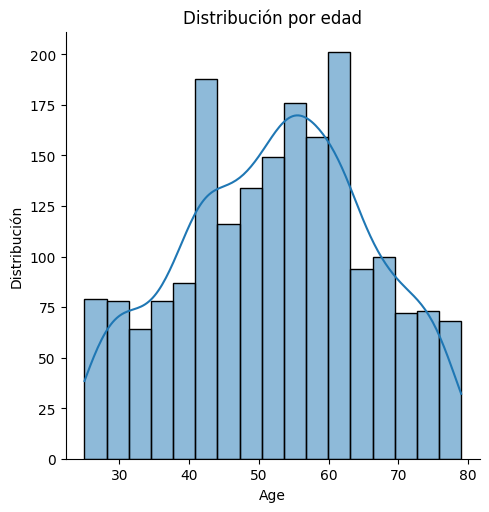

In [ ]:
# Veamos en que rango de edades se encuentras las personas
sns.displot(x=df_copy['Age'], kde=True).set(ylabel= 'Distribución',title='Distribución por edad')

[Text(0.5, 1.0, 'Age vs Target')]

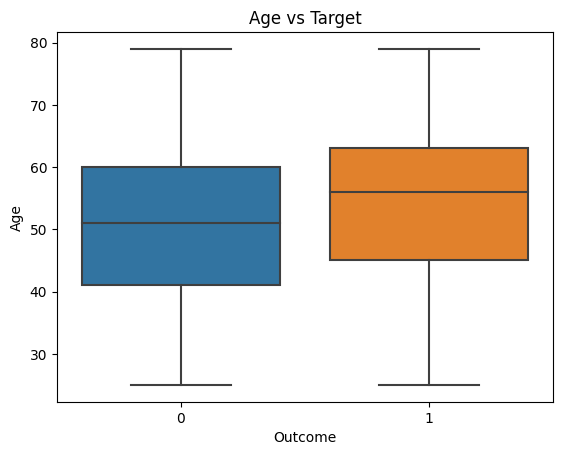

In [ ]:
sns.boxplot(x =df_copy["Outcome"], y = df_copy["Age"]).set(title='Age vs Target')

[Text(0, 0.5, 'Sexo'), Text(0.5, 1.0, 'Edad según sexo')]

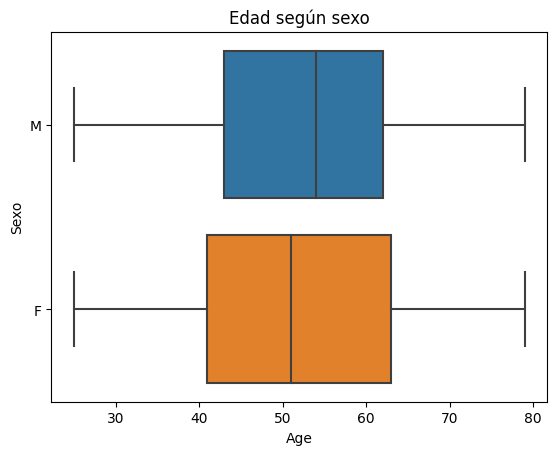

In [ ]:
sns.boxplot(x =df_copy["Age"], y = df_copy["Sex"]).set(ylabel= 'Sexo', title='Edad según sexo')

La distribución parece ser aproximadamente normal. En el boxplot podemos ver que las "cajas" abarcan casi el mismo rango de edades, con la diferencia que el de las mujeres comienza a una edad más temprana.

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'Sex vs. Target')]

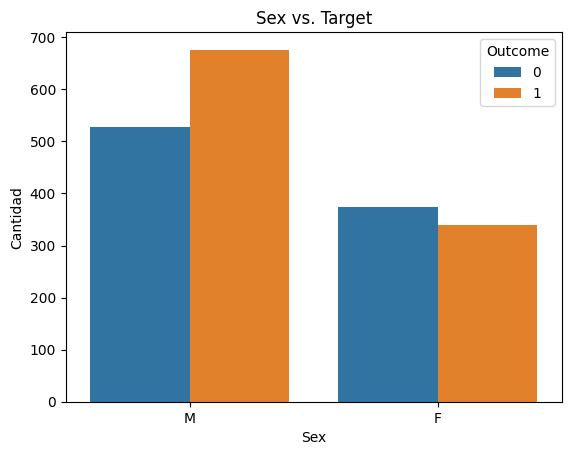

In [ ]:
sns.countplot(x=df_copy['Sex'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='Sex vs. Target')

[Text(0, 0.5, 'Sexo'), Text(0.5, 1.0, 'Colesterol según sexo')]

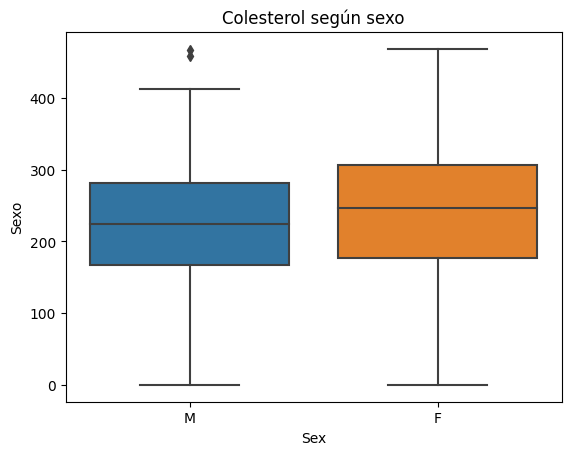

In [ ]:
sns.boxplot(y =df_copy["Cholesterol"], x = df_copy["Sex"]).set(ylabel= 'Sexo', title='Colesterol según sexo')

In [ ]:
df_copy['Cholesterol'].quantile(0.25)

171.0

In [ ]:
df_copy['Cholesterol'].quantile(0.75)

291.0

[Text(0.5, 1.0, 'Cholesterol vs Target')]

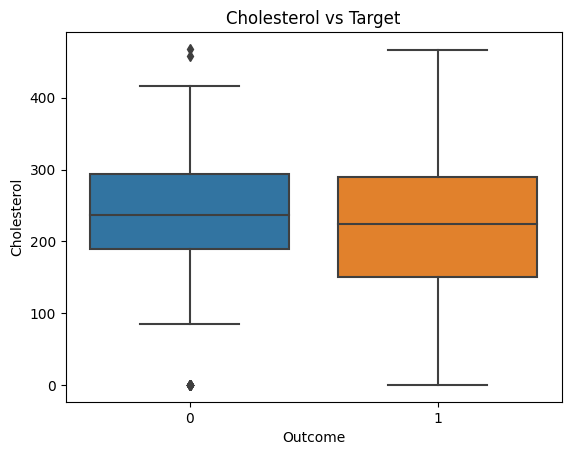

In [ ]:
sns.boxplot(x=df_copy['Outcome'], y=df_copy['Cholesterol']).set(title= "Cholesterol vs Target")

Aquí podemos ver que para los hombres, la caja del boxplot (entre el 25% y 75% de los datos) se ubican entre aproximadamente los valores de 170 y 290. Podemos ver una cantidad notable de valroes atípicos, excediendo los 400 y llegando hasta 600.

En cambio en las mujeres tiene una distribución mas "pareja", entran mas valores dentro de la caja, y los bigotes del boxplot van hasta mas de 450. Detectando pocos outliers.

Es decir, comunmente las mujeres alcanzan valores más altos de colesterol, pero se han registrado valores mas altos para hombres.

In [ ]:
df_copy.Cholesterol.value_counts(dropna=False)

0      160
254     18
223     14
260     14
294     13
      ... 
412      1
137      1
458      1
404      1
85       1
Name: Cholesterol, Length: 307, dtype: int64

De 2080 registros, 160

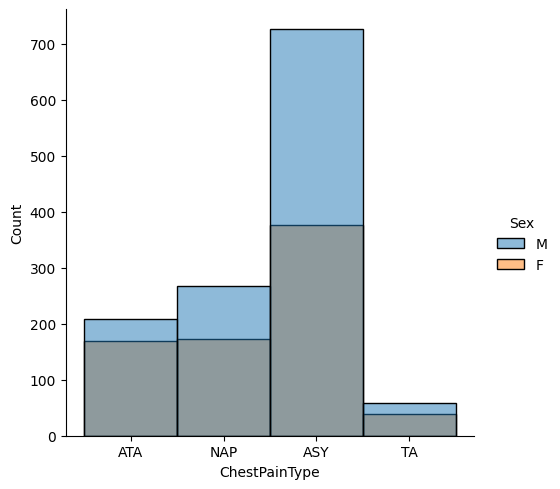

In [ ]:
# Veamos como es la distribución por sexo para los distintos dolores de pecho. Luego veremos la distribución por sexo en caso que tengan o no angina por ejercicio.

sns.displot(df_copy, x=df['ChestPainType'], hue = df['Sex'])

El patrón es similar para ambos sexos.

Se puede destacar que en el caso que no hay síntomas de dolor de pecho, se han registrado muchos más casos. En los 3 casos restantes de tipos de dolor, la distribución es pareja para cada uno de los casos.

[Text(0.5, 0, 'Tipo de dolor de pecho'),
 Text(0.5, 1.0, 'Distribución de MaxHR por tipo de dolor')]

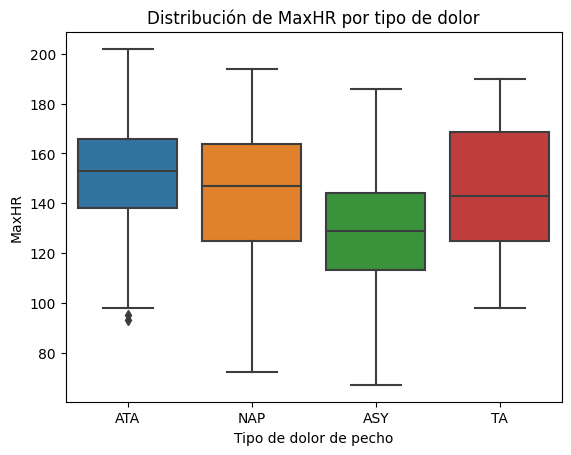

In [ ]:
# veamos si hay algun tipo de relacion entre el dolor de pecho y la frecuencia maxima
sns.boxplot(data=df_copy, x=df_copy['ChestPainType'], y=df_copy['MaxHR']).set(xlabel='Tipo de dolor de pecho', title='Distribución de MaxHR por tipo de dolor')

Los de menor frecuencia máxima son los de tipo asintomático.
Para los otros tres tipos de dolor (típica, atípica y no anginoso), presetan una media similar, siendo el caso "típico" en que se encuentra la caja con valores mas altos (entre Q1 y Q3), y para el casó atípico se registran los valores más altos.


[Text(0.5, 1.0, 'Distribución de "Dolor de pecho" vs "Target'),
 Text(0.5, 0, 'Dolor de pecho'),
 Text(0, 0.5, 'Cantidad')]

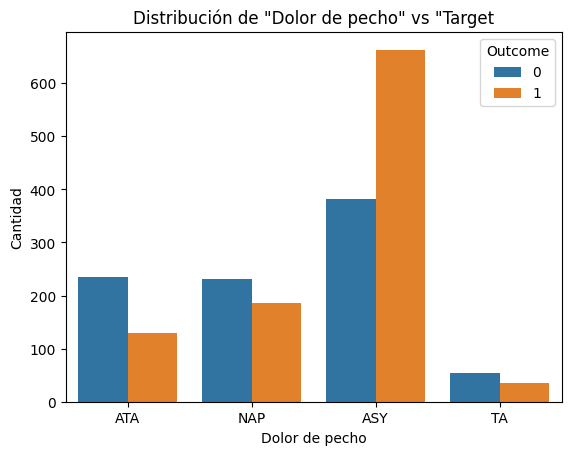

In [ ]:
# Veamos si las personas que tienen dolor de pecho, registraban 0 o 1 en la variable target

sns.countplot(data=df_copy, x =df_copy['ChestPainType'], hue = df_copy['Outcome']).set(title='Distribución de "Dolor de pecho" vs "Target', xlabel = 'Dolor de pecho', ylabel='Cantidad')

([<matplotlib.axis.XTick at 0x7fadcf95bb50>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

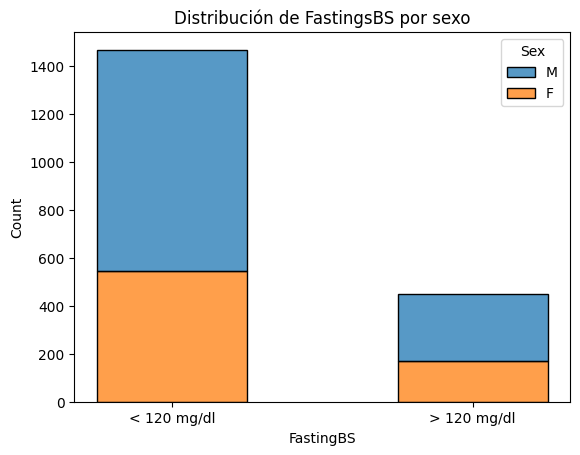

In [ ]:
# Análisis para FastingsBS. Veamos como se distribuye por sexo, por edad y su relación con la variable target
labels=['< 120 mg/dl', '> 120 mg/dl']
sns.histplot(x=df_copy['FastingBS'], hue=df_copy['Sex'], multiple='stack', discrete = True, shrink = 0.5).set(title='Distribución de FastingsBS por sexo')
plt.xticks([0,1],labels)


([<matplotlib.axis.XTick at 0x7fadcf7f7f70>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

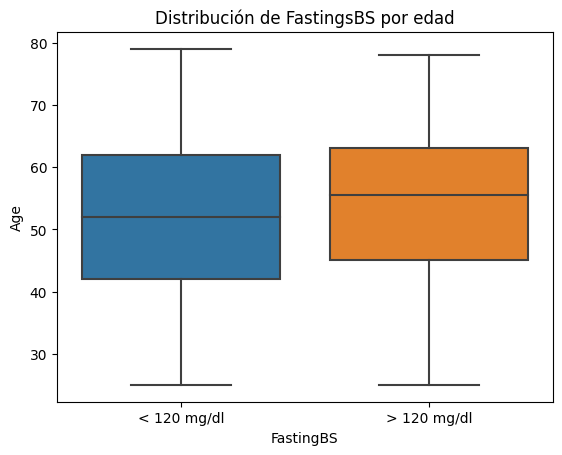

In [ ]:
labels=['< 120 mg/dl', '> 120 mg/dl']
sns.boxplot(x=df_copy['FastingBS'], y=df_copy['Age']).set(title='Distribución de FastingsBS por edad')
plt.xticks([0,1],labels)

([<matplotlib.axis.XTick at 0x7fadcf8949d0>,
 [Text(0, 0, '< 120 mg/dl'), Text(1, 0, '> 120 mg/dl')])

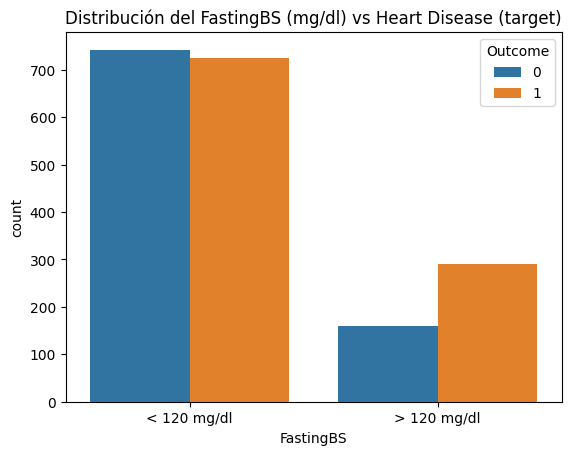

In [ ]:
sns.countplot(x =df_copy['FastingBS'], hue = df_copy['Outcome']).set(title='Distribución del FastingBS (mg/dl) vs Heart Disease (target)')
plt.xticks([0, 1],labels)

La acumulación para casos donde FastingsBS < 120 mg/dl es prácticamente igual si había o no cardiopatía. En cambio, si FastingsBS > 120 mg/dl la cantidad de casos en los que si había cardiopatía supera en casi el doble a los casos negativos.

[Text(0.5, 1.0, '"RestingECG" vs "Sexo'),
 Text(0.5, 0, 'Electrocardiograma en reposo'),
 Text(0, 0.5, 'Cantidad')]

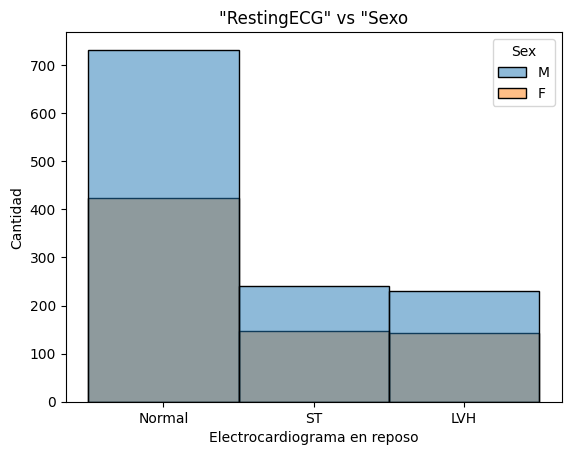

In [ ]:
# Comportamiento del electrocardiograma segun el sexo
sns.histplot(x =df_copy['RestingECG'], hue = df_copy['Sex']).set(title='"RestingECG" vs "Sexo', xlabel = 'Electrocardiograma en reposo', ylabel='Cantidad')

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'RestingECG vs. Target')]

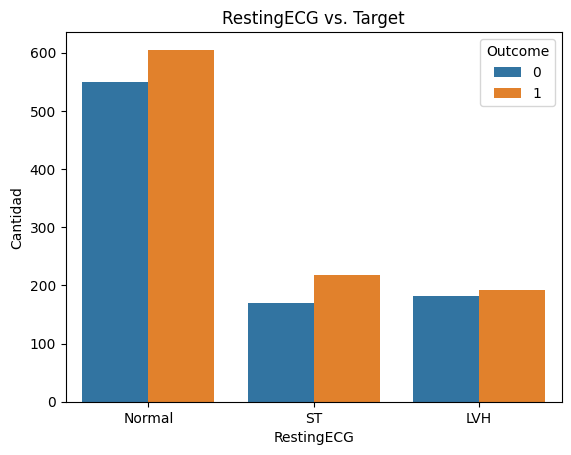

In [ ]:
sns.countplot(x=df_copy['RestingECG'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='RestingECG vs. Target')

[Text(0.5, 1.0, 'MaxHR según sexo')]

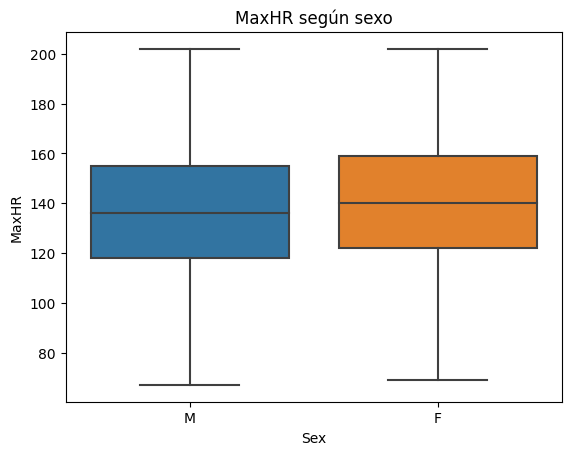

In [ ]:
# MaxHR por sexo
sns.boxplot(x=df_copy['Sex'], y=df_copy['MaxHR']).set(title= "MaxHR según sexo")

Tienen para ambos sexos una distribución similar, siendo el rango intercuartil de las mujeres apenas más elevado.

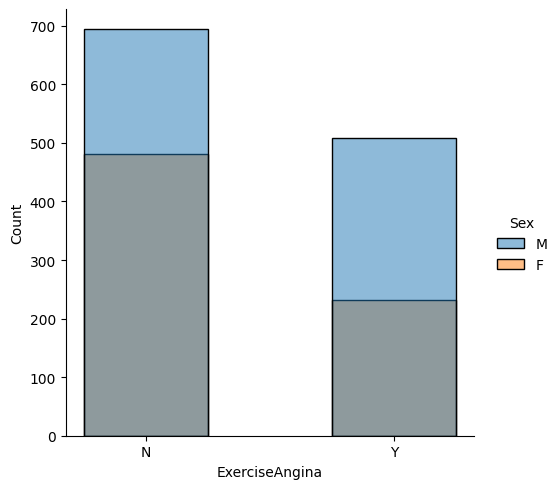

In [ ]:
#Angina inducida por ejercicio segun el sexo
sns.displot(df, x=df_copy['ExerciseAngina'], hue = df_copy['Sex'], shrink= 0.5)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

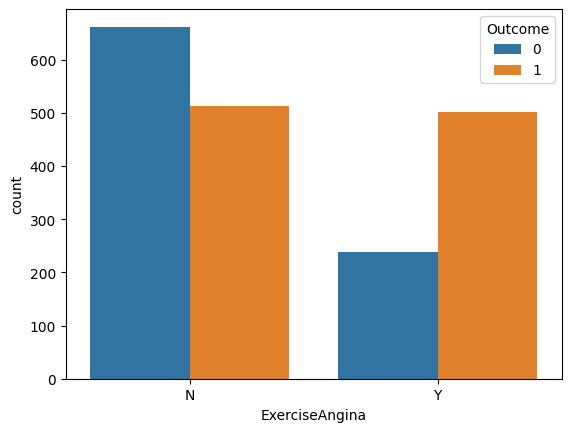

In [ ]:
sns.countplot(x=df_copy['ExerciseAngina'], hue = df_copy['Outcome'])

Es evidente que en los casos que si hubo angina inducida por ejercicio, la cantidad de casos en la que se registra una cardiopatía es aproximadamente el doble a los casos que no.

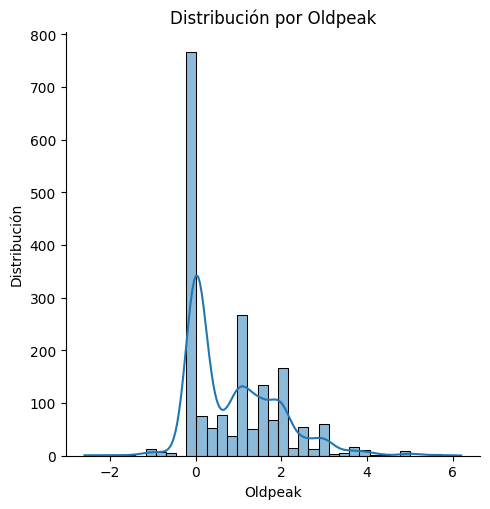

In [ ]:
# Veamos la distribución de la variable Oldpeak
sns.displot(data=df_copy, x='Oldpeak', kde=True).set(ylabel= 'Distribución',title='Distribución por Oldpeak')

<Axes: xlabel='ST_Slope', ylabel='Count'>

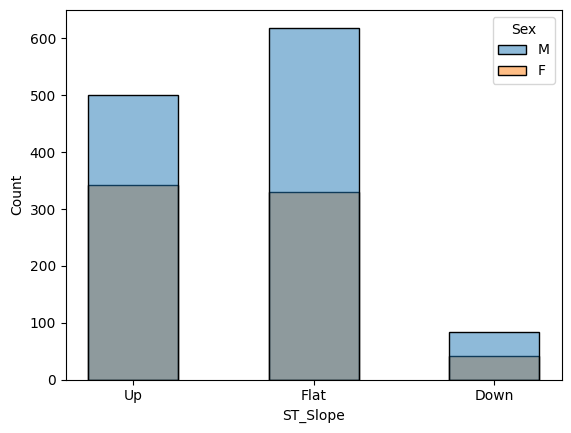

In [ ]:
# Veamos la distribución de Slope por sexo
sns.histplot(x=df_copy['ST_Slope'], hue=df_copy['Sex'], shrink = 0.5)

[Text(0, 0.5, 'Cantidad'), Text(0.5, 1.0, 'Distribución ST_Slope vs. Target')]

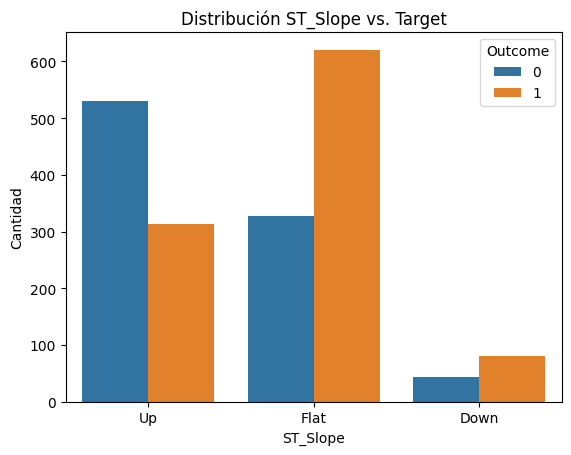

In [ ]:
# Relación entre ST_Slope y cardiopatía
sns.countplot(x=df_copy['ST_Slope'], hue=df_copy['Outcome']).set(ylabel='Cantidad', title='Distribución ST_Slope vs. Target')

Se registraron muchos más diagnósticos de cardiopatía en los casos en que Slope es Flat.

## Respondiendo las preguntas planteadas

En base a los insights que obtuvimos con las visualizaciones, responderemos las preguntas planteadas:

* ¿Qué relación hay entre la edad de los pacientes y una cardiopatía diagnosticada?

A partir de los gráficos de caja, podemos ver que el promedio de edad de personas con cardiopatías es algo mayor que las que no tienen. Siendo para los casos negativos una media de casi 50 años, y para los positivos casi 60.
Con esto podemos intuir que a mayor edad, más probable es que padezca una enfermedad del corazón.

* ¿Es más habitual una cardiopatía en hombres o en mujeres?

Según el countplot que hemos realizado, para los hombres es significativamente mayor la cantidad con cardiopatías. En la cambio para mujeres, la distribución es casi la misma, pero siendo la mayor la de casos positivos.

* Tanto en hombres como mujeres, ¿predomina algún tipo de dolor de pecho sobre el resto? ¿si hay cardiopatía diagnosticada, algún tipo de dolor es mas común?

El tipo "asintomático" destaca notablemente sobre el resto. Además, el tipo "asintomático" es el único que presenta más casos positivos de que negativos.
Esto podría ser confuso, ya que particularmente el caso que más positivos presenta es el asintomático.

* ¿Existe una relación entre una cardiopatía y los valores de glucemia?

Para los pacientes que tuvieron como resultado 120 mg/dl la distribución fue casi la misma (y son la mayoría de los casos). Pero cuando el valor fue mayor a 120 mg/dl los casos positivos fueron casi el doble que los negativos.

* ¿Que características del electrocardiograma están  mas asociadas a una cardiopatía?

Para los tres casos de ECG la distribución es similar, pero en el caso de "Normal" se presentan más casos positivos.

# Décima entrega: regresión lineal.

Para esta parte del proyecto queremos comenzar a tratar la predicción de valores y entrenamiento de modelos de machine learning usando regresiones lineales.

Dadas las variables que dispone el dataset, y siendo la mayoría de tipo categórica, no creo que tenga mucho sentido utilizar este tipo de regresión para este dataset. Pero para tener una idea de que esto es realmente así, haremos uso de un pairplot para ver la distribución de las variables numéricas y cómo es el scatterplot entre ellas para ver si tiene sentido aplicar una regresión lineal para nuestros datos.

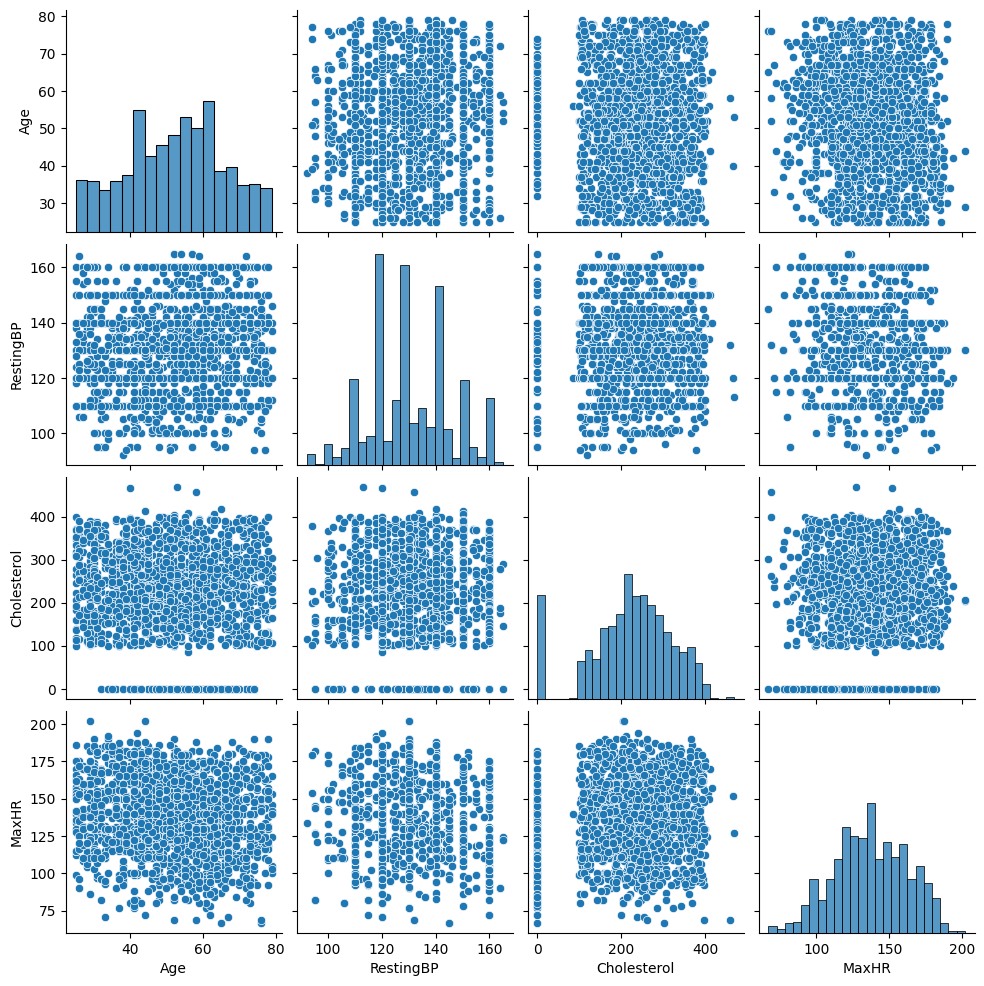

In [ ]:
sns.pairplot(df_copy, vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR'])

Como habíamos previsto, los scatterplot entre las variables numéricas no son ni parecidas a un grupo de puntos que se pueda asociar a una línea recta. De esta manera no tiene sentido aplicar una regresión lineal.

Dadas las circunstacias de este dataset, y para poder aplicar y entender la regresión lineal, crearemos un dataset sintético (que nada tendrá que ver el original).

Para esto, usaremos el método make_regression de la librería sklearn.

In [ ]:
# crearemos un dataset con 500 registros, que incluirá 5 features
X, y = make_regression(n_samples=500, n_features=5, noise=12, random_state=42)

#lo guardamos como un dataframe
X = pd.DataFrame(X, columns=['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5'])
X.head()

,Store_1,Store_2,Store_3,Store_4,Store_5
0,0.560919,-0.370011,-0.295480,-0.258796,1.598647
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267
2,-2.650970,0.106430,1.091507,-0.254977,1.503993
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334


In [ ]:
#creemos a su vez, 2 variables binarias, 2 categóricas y 2 ordianles

# Generar las características binarias
X_bin = np.random.randint(0, 2, size=(500, 2))

# Generar las características categóricas
X_cat = np.random.choice(['A', 'B', 'C'], size=(500, 2))

# Generar las características ordinales
X_ord = np.random.choice(['Low', 'Medium', 'High'], size=(500, 2))

# Concatenar todas las características
X_otras_variables = np.concatenate((X_bin, X_cat, X_ord), axis=1)

# creamos dataframe con las variables
feature_names = ['X_bin_' + str(i) for i in range(2)]
feature_names += ['X_cat_' + str(i) for i in range(2)]
feature_names += ['X_ord_' + str(i) for i in range(2)]

df_otras_X = pd.DataFrame(data=X_otras_variables, columns=feature_names)
df_otras_X.head()

,X_bin_0,X_bin_1,X_cat_0,X_cat_1,X_ord_0,X_ord_1
0,1,1,A,A,Medium,Medium
1,1,0,B,A,Low,Medium
2,1,0,C,A,Medium,Low
3,0,0,A,B,High,Low
4,0,0,B,A,High,High


In [ ]:
df_reg = pd.concat([X, df_otras_X], axis=1)

In [ ]:
# hacemos lo mismo para Target (y)
y = pd.DataFrame(y, columns=['Target'])
y.head()

,Target
0,-37.700794
1,-140.601999
2,-49.648262
3,-123.817870
4,-168.682964


In [ ]:
#ahora los combinamos para que queden en un mismo dataframe
df_reg = pd.concat([df_reg, y], axis=1)
df_reg.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,X_bin_0,X_bin_1,X_cat_0,X_cat_1,X_ord_0,X_ord_1,Target
0,0.560919,-0.370011,-0.295480,-0.258796,1.598647,1,1,A,A,Medium,Medium,-37.700794
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,1,0,B,A,Low,Medium,-140.601999
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,1,0,C,A,Medium,Low,-49.648262
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,0,0,A,B,High,Low,-123.817870
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,0,0,B,A,High,High,-168.682964


Veamos con un pairplot como es la distribución de cada una de las variables numéricas, y cómo es el scatterplot entre éstas.

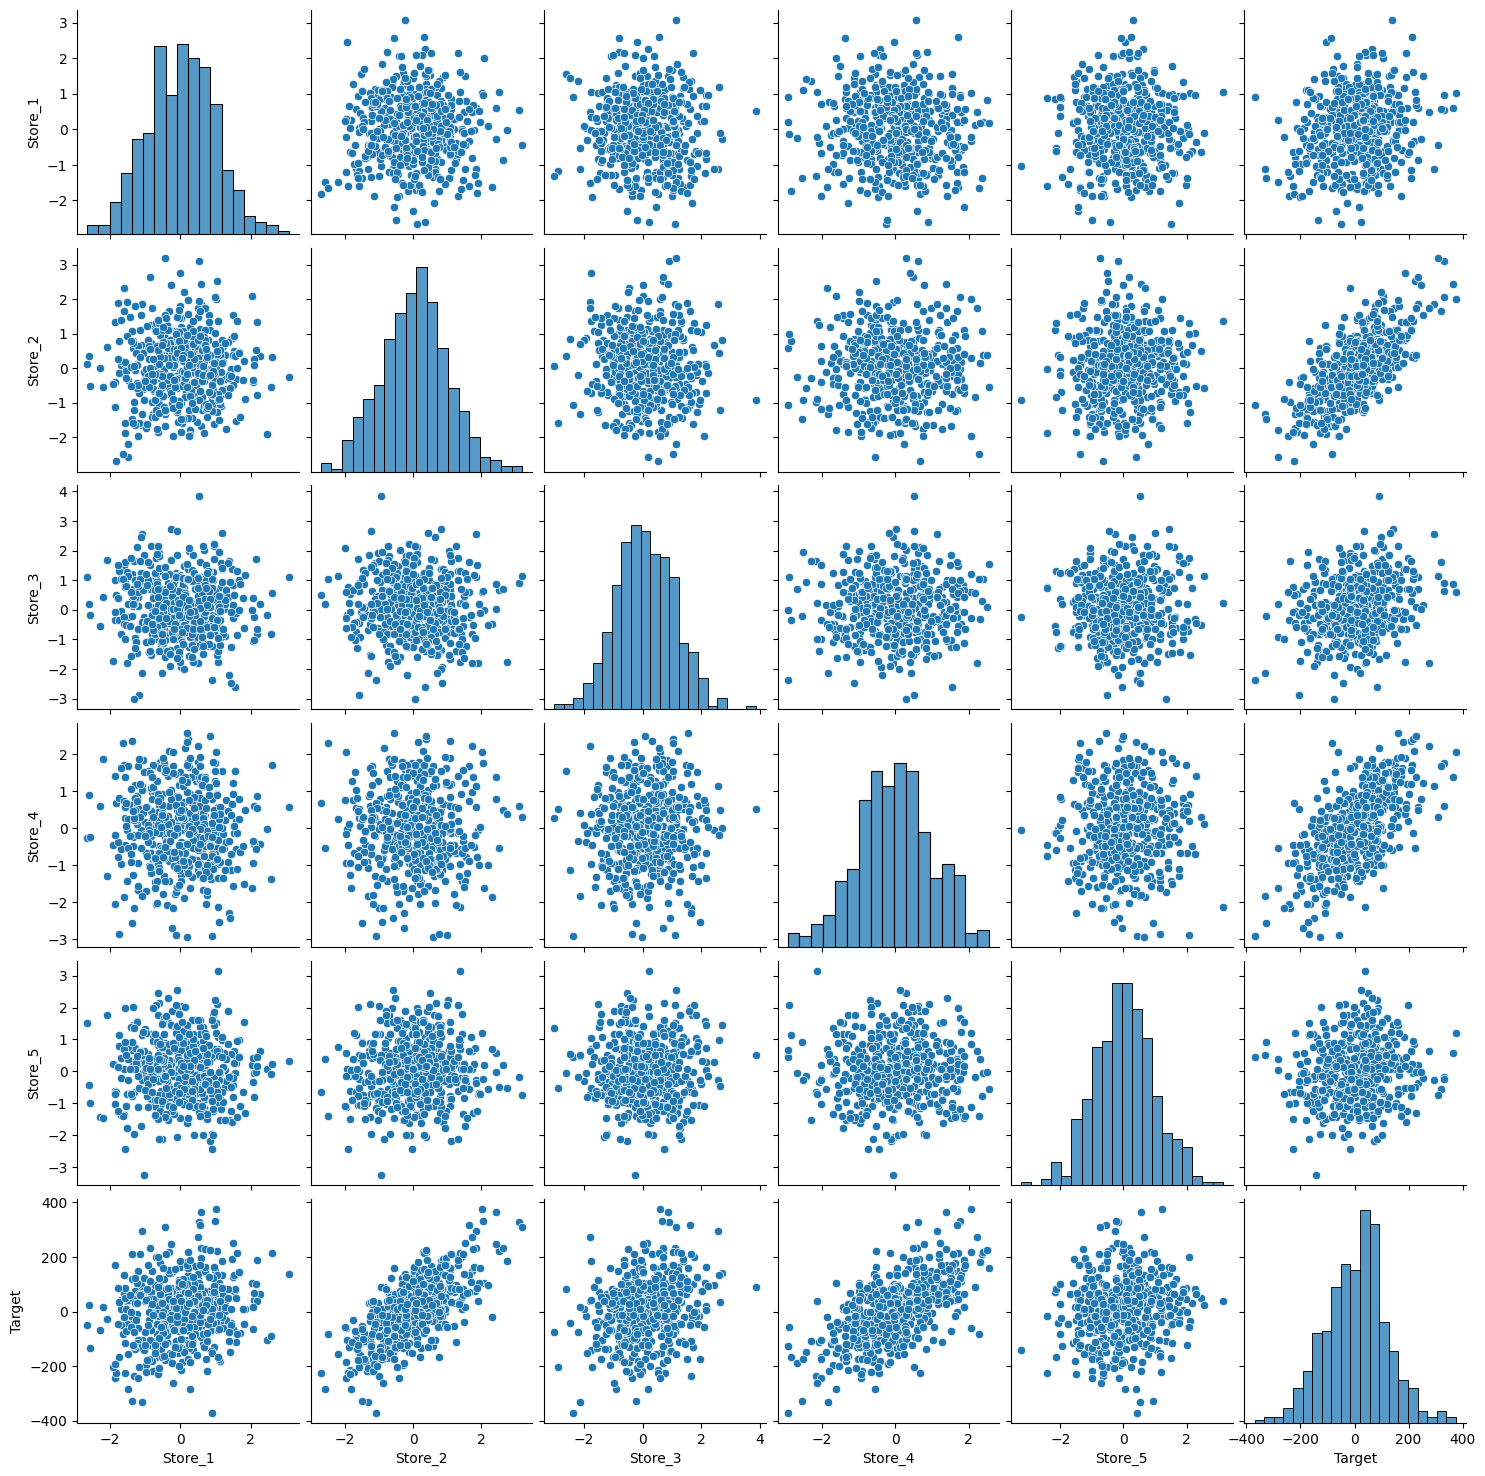

In [ ]:
sns.pairplot(df_reg, vars=['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Target'])

Podemos ver que en algunos de los scatterplot, la distribución de los puntos podría llegar a representar con una línea recta.
Veamos la correlación de éstas variables numéricas con un heatmap.

<ipython-input-63-09d49ae4901a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_reg.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'Blues')


<Axes: >

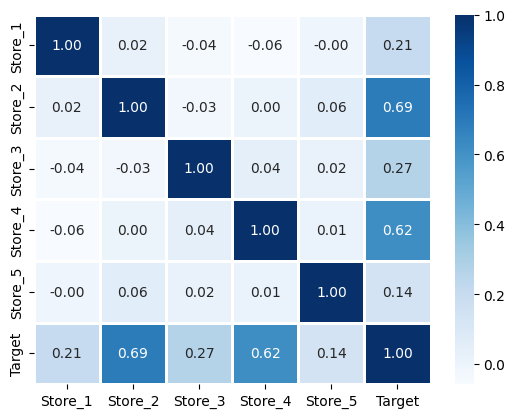

In [ ]:
sns.heatmap(df_reg.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'Blues')

Los mejores valores de correlación se dieron entre la variables:
 * Store_2 vs. Sales
 * Store_4 vs. Sales

Entonces la propuesta es analizar que tan buenas son las variables Store_2 y Store_4 para predecir los valores de la variable Target.

## Store_2 vs. Target

En principio, la correlación más alta entre variables numéricas que hay en el dataset es de 0.69. Indica una relación directa má o menos pronunciada, pero que evidentemente podría ser mucho mejor. A partir de aquí haremos un análisis para ver qué tan buena es la variable Store_2 para predecir los registros de Target.

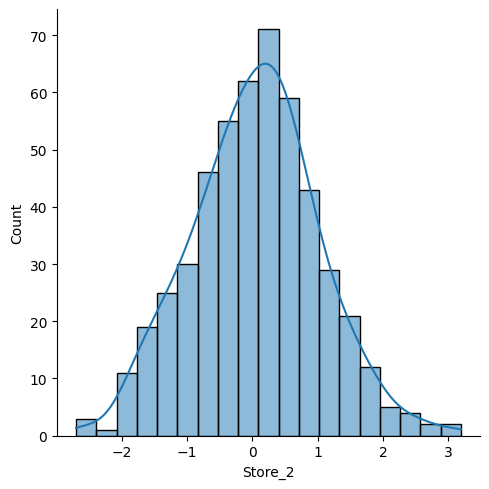

In [ ]:
sns.displot(df_reg['Store_2'], kde=True)

<Axes: xlabel='Store_2', ylabel='Target'>

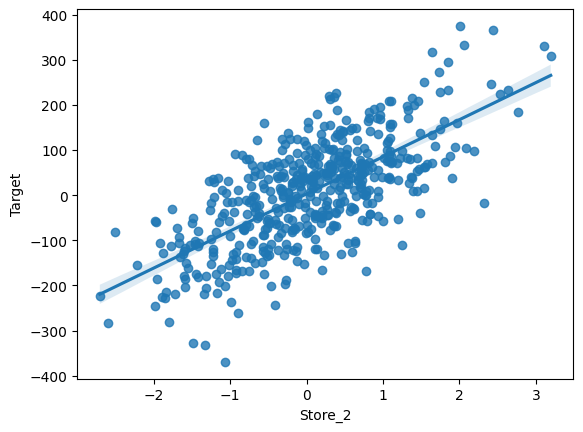

In [ ]:
sns.regplot(x=df_reg['Store_2'],y=df_reg['Target'])

In [ ]:
from sklearn.model_selection import train_test_split

La idea es que a partamos de una variable independiente para hacer una regresión lineal simple, y entrenar los datos para poder predecir los resultados de la variable Target.
En este caso la variable independiente será ``Store_2`` y la variable dependiente y será ``Target``.

La variable X Store_2 será dividida en dos partes: una de "entrenamiento" y otra de "test". La de entrenamiento será justamente la que entrenará al modelo de regresión lineal para cada vez arrojar mejores resultados, y la parte de test serán los valores que se quieren predecir.
Usualmente se usa un 80% de los registros para entrenamiento y 20% test.
La variable Target se dividirá de la misma manera para el modelo.

In [ ]:
X=df_reg[['Store_2']] #feature
y=df_reg[['Target']] #target

In [ ]:
shapiro_wilk_test(X,alpha=0.5)

No se puede rechazar la hipótesis nula (los datos siguen una distribución normal)


In [ ]:
#como X sigue una distribucion normal usamos StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Standardization

X = ss.fit_transform(X)

In [ ]:
#divido los registros en 80% para train y 20% test utilizando test_train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#para reducir los sesgos, los registros se eligen de manera aleatoria

In [ ]:
#importamos el modelo de regresión lineal para entrenar los datos
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# hacemos las predicciones a partir del X_train
y_train_pred = model.predict(X_train)

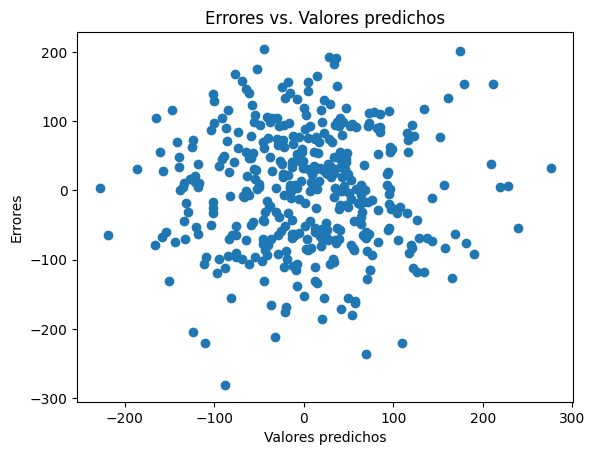

In [ ]:
# calculamos los errores para los registros de y, es decir, la diferencia entre entrenamiento y predicción
errores = y_train - y_train_pred

# veamos la homocedasticidad (es decir, verifiquemos que la dispersion de los errores no cambia, se comporta aleatoriamente)
plt.scatter(y_train_pred, errores)
plt.xlabel('Valores predichos')
plt.ylabel('Errores')
plt.title('Errores vs. Valores predichos')
plt.show()

En principio es correcto que los errores se vean graficados de esa manera (aleatoriamente, sin un patrón definido), entonces podemos asumir que siguen el principio de hocedasticidad.
Veamos si los errores siguen una distribución normal.

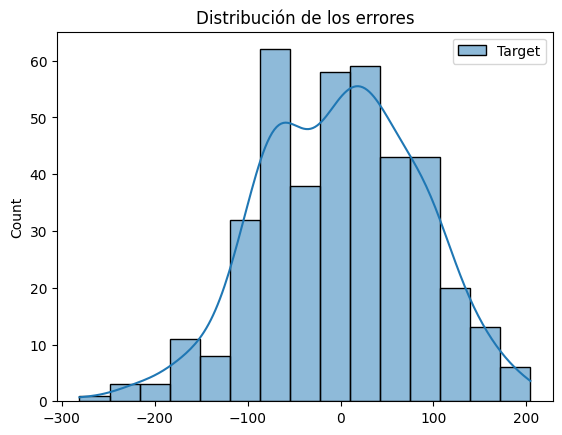

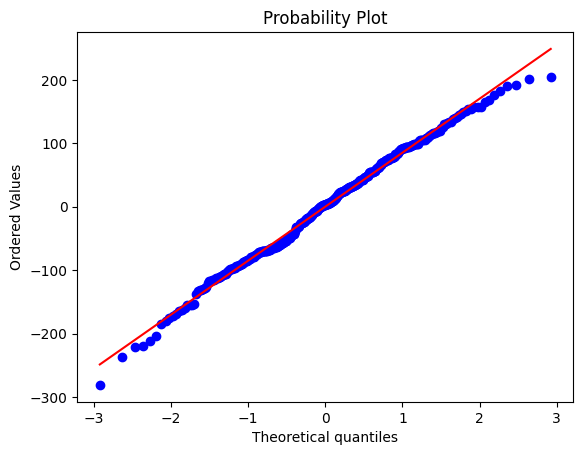

In [ ]:
#verificamos normalidad
sns.histplot(errores, kde=True)
plt.title('Distribución de los errores')
plt.show()

probplot(errores['Target'].values, plot=plt) #usamos .values porque "errores" esta estructurado como un dataframe y lo queremos plano para poder usar probplot
plt.show()

En la visualizacion superior tenemos un histograma de los errores, pareciera que siguen una distribución normal, pero para corroborar esto podemos usar la herramienta .probplot de scipy, la cual compara la distribución teórica con los datos empíricos.
Si los datos se ajustan bien, veremos que se aproximan a la recta grafica (que es lo que sucede en la gráfica). Entonces podemos suponer que la distribución de los errores es normal.

Ya habiendo entrenado los datos, lo siguiente será aplicar el modelo para predecir los valores de test.

In [ ]:
#predecimos la y_test a partir de X_test
y_test_pred = model.predict(X_test)

In [ ]:
# calculo de r2
r2 = r2_score(y_test, y_test_pred)
print(f'R cudrado: {r2}')

# calculo MAE (error medio absoluto)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'MAE: {mae}')

# calculo MSE (error medio absoluto)
mse = mean_squared_error(y_test, y_test_pred)
#no la imprimimos porque no nos será de mucha utilidad al estar en otras unidades

# calculo RMSE (error cuadrático medio)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

R cudrado: 0.4924548478097833
MAE: 61.77103084485565
RMSE: 77.79474547489241


In [ ]:
y_test.min()

Target   -260.110767
dtype: float64

In [ ]:
y_test.max()

Target    329.776407
dtype: float64

Analicemos los resultados:

* R2: nos indica el porcentaje de la variable dependiente (y) que puede ser explicado por el modelo de regresión a partir de la variable dependiente. El valor 0.49 no es muy bueno, es decir que explica menos de la mitad de los datos y debería mejorarse.

* MAE: es la diferencia absoluta entre el valor objetivo y el valor predicho por el modelo. El valor que arrojó metrics (61.771) es muy alto, representa un valor casi el 10% de rango de y_test, el cual es aproximadamente [-260,329].

* RMSE:  representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado. Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. Usualmente es mayor al MAE ya que al calcular los cuadrados, la métrica dio mas peso a los valores más grandes. El valor 77.79, así como el anterior, podría mejorarse.

En síntesis, la medida R2 nos indica la calidad del modelo, es decir, qué tan bueno fue. En tanto a MAE y RMSE nos dan una idea de que tan precisas fueron las mediciones, y nos serviran sobretodo para comparar con otros modelos.

In [ ]:
# generamos un rango de valores que cubra a los valores de X
x_range = np.linspace(X_train.min(), X_test.max(), 500)

# lo pasamos a 2D
x_range_reshaped = x_range.reshape(-1, 1)

# usamos de nuevo el modelo para predecir los valores de y a partir de los de x_range
y_range_pred = model.predict(x_range_reshaped)

In [ ]:
# para podre hacer el scatterplot necesitamos que X_train, X_test, y_train, y_test sean de una dimension

In [ ]:
X_train = np.squeeze(X_train)
y_train = np.squeeze(y_train)
X_test = np.squeeze(X_test)
y_test = np.squeeze(y_test)

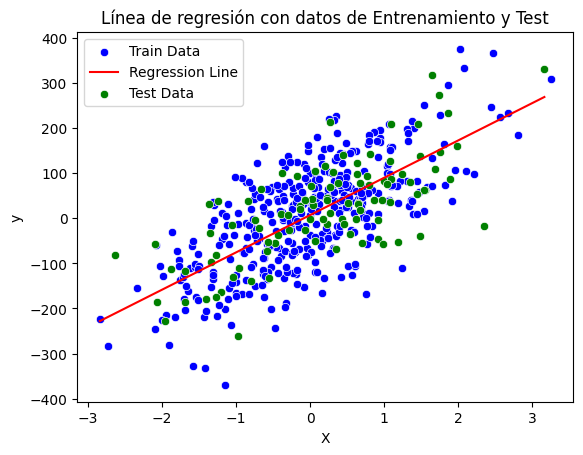

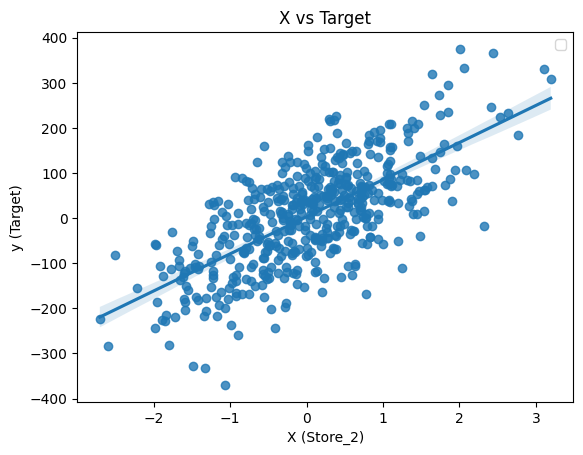

In [ ]:
# graficamos los datos entrenados y la línea de regresión que generamos
sns.scatterplot(x=X_train, y=y_train, color='blue', label='Train Data')
sns.lineplot(x=x_range, y=y_range_pred.flatten(), color='red', label='Regression Line')

# graficamos la parte de test de los registros
sns.scatterplot(x=X_test, y=y_test, color='green', label='Test Data')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Línea de regresión con datos de Entrenamiento y Test')
plt.legend()
plt.show()

# Scatterplot de feature vs. target (el mismo que hicimos anteriormente)
sns.regplot(x=df_reg['Store_2'],y=df_reg['Target'])

plt.xlabel('X (Store_2)')
plt.ylabel('y (Target)')
plt.title('X vs Target')
plt.legend()

En la celda anterior tenemos dos visualizaciones: en la de abajo tenemos la misma visualizacion que habíamos hecho anteriormente. Un gráfico de puntos de la variable X (Store_2) vs. y (Target), y la línea de regresión que generó el reglplot de seaborn.

En la visualización de arriba tenemos la línea de regresión generada con una nueva variable X que tiene el mismo rango de valores que la X original, y además una nueva variable Y que fue predicha a partir de la nueva X usando el mismo modelo de regresión lineal. También en esta visualización esta presente la línea de regresion generada con la función lineplot de seaborn.

Al comparar las imágenes podemos ver que ambas son prácticamente iguales. Y los puntos verdes (predichos) de la gráfica superior ocupan básicamente la misma posicion en la gráfica inferior en color azul.

* En conclusión, al haber una correlación no tan alta entre la feature Store_2 y Target, la predicción se acercó bastante a los valores esperados, pero al calcular las métricas vimos que el modelo no fue lo suficientemente bueno para explicar a los datos, y a veces introduciendo errores de precisión bastante grandes. En otras instancias se podría comparar estos resultados con los de otro modelo para ver si realmente fueron buenos o no los resultados.

# Undécima entrega: algoritmos de clasificación.

In [ ]:
df_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


El dataset se encuentra en "crudo", por lo que antes de poder aplicar los algoritmos de clasificación tenemos que poner a punto los datos. Sino, obtendremos resultados que no son correctos.

Para esto, tenemos que normalizar las variables. Como hicimos anteriormente, nos valdremos de dos métodos para esto: MinMaxScaler y StandardScaler.
Recordemos que en caso de que la distribución no sea normal, tendremos que aplicar MinMaxScaler, sino lo mejor sería usar StandardScaler.

Además, también tenemos que convertir las variables categóricas a numéricas haciando uso de algún encoder. (en este caso, será para: ``Sex``,  ``ChestPainType``, ``RestingECG``, ``ExerciseAngina`` y ``St_Slope``. Para ``Outcome`` lo hicimos previamente.

In [ ]:
le = LabelEncoder()
df_le = df_copy.copy(deep = True)

df_le['Sex'] = le.fit_transform(df_le['Sex'])
df_le['ChestPainType'] = le.fit_transform(df_le['ChestPainType'])
df_le['RestingECG'] = le.fit_transform(df_le['RestingECG'])
df_le['ExerciseAngina'] = le.fit_transform(df_le['ExerciseAngina'])
df_le['ST_Slope'] = le.fit_transform(df_le['ST_Slope'])

## Normalización de los datos

Ya habpiamos visto anteriormente, utilizando la prueba de Shapiro-Wilk cuáles variables seguían una distribución normal.

En base a los resultados que arrojó el test para las variables Age, Oldpeak, RestingBP, Cholesterol y MaxHR ningun seguía una distribución normal. Por lo que las normalizaremos utilizando MinMaxScaler.

In [ ]:
mms = MinMaxScaler()

df_le['Age'] = mms.fit_transform(df_le[['Age']])
df_le['RestingBP'] = mms.fit_transform(df_le[['RestingBP']])
df_le['Cholesterol'] = mms.fit_transform(df_le[['Cholesterol']])
df_le['MaxHR'] = mms.fit_transform(df_le[['MaxHR']])
df_le['Oldpeak'] = mms.fit_transform(df_le[['Oldpeak']])
df_le.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Outcome
0,0.277778,1,1,0.657534,0.617521,0,1,0.777778,0,0.295455,2,0
1,0.444444,0,2,0.931507,0.384615,0,1,0.659259,0,0.409091,1,1
2,0.222222,1,1,0.520548,0.604701,0,2,0.229630,0,0.295455,2,0
3,0.425926,0,0,0.630137,0.457265,0,1,0.303704,1,0.465909,1,1
4,0.537037,1,2,0.794521,0.416667,0,1,0.407407,0,0.295455,2,0


Veamos la correlación entre las variables, prestando particular atención en la correlación con Outcome.

<Axes: >

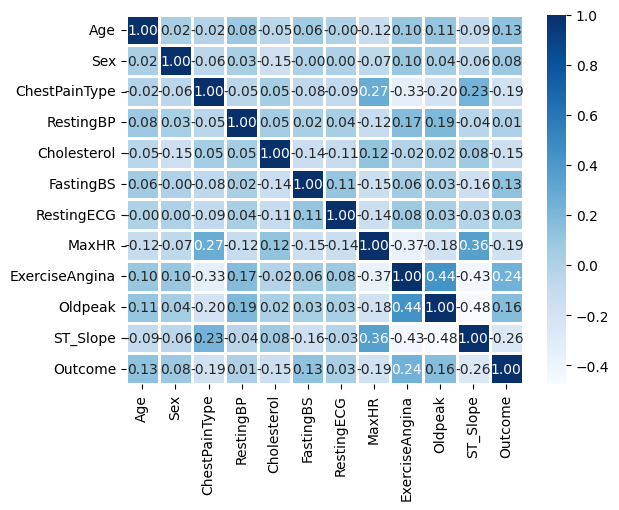

In [ ]:
sns.heatmap(df_le.corr(),fmt = ".2f",annot=True,lw=1,cmap = 'Blues')

In [ ]:
#Divido los datos en Train y Test

X = df_le.drop(columns = 'Outcome') # Train
y = df_le['Outcome']

In [ ]:
# Tomamos de anera aleatoria el 70% de los registros para Train y el 30% restante como Test.
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size= 0.7,random_state = 42,shuffle=True)

Observaciones: será útil recordar más tarde que el 30% de los registros son 575 registros.
Además es conveniente saber si las categorías de Target aparecen en cantidades similares (esto será crucial para enteder el resultado del accuracy más adelante).


In [ ]:
df_le['Outcome'].value_counts()

1    1015
0     901
Name: Outcome, dtype: int64

## Modelo: SVM (Support Vector Machine)

In [ ]:
# Creamos el modelo SVM y entrenamos los datos

svc = SVC(C = 100, kernel = 'linear', random_state=42)
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear', random_state=42)

In [ ]:
# Ahora hacemos las predicciones

y_test_pred_svm = svc.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

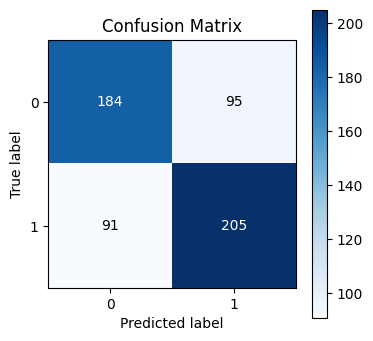

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_svm,figsize=(4,4))

In [ ]:
# Print classification report for SVM
print("Classification report for SVM:\n", classification_report(y_test, y_test_pred_svm))

Classification report for SVM:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66       279
           1       0.68      0.69      0.69       296

    accuracy                           0.68       575
   macro avg       0.68      0.68      0.68       575
weighted avg       0.68      0.68      0.68       575



En la matriz de confusión vemos que de los 575 registros a predecir, 184 fueron predecidos correctamente como verdaderos (True Positive), y 205 correctamente como negativos (True Negative). El resto de los registros fueron mal predichos como Falso positivo (Error tipo 1) o Falso negativo (Error tipo 2).

A partir de los datos que arroja la matriz de confusión se pueden calcular distintas métricas que dan información acerca del desempeño del modelo.

* Accuray (exactitud): indica la proporción de predicciones correctas. Como el resultado es 0.68, significa que el modelo predijo correctamente el 68% de los registros aproximadamente.

* Para la etiqueta Outcome = 0:
  * Precision_0 = 0.67. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 67% de las veces

  * Recall_0 = 0.66. El algoritmo predijo correctamente que Outcome=0 el 66% de las veces.

* Para la etiqueta Outcome = 1:
  * Precision_0 = 0.68. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 68% de las veces

  * Recall_0 = 0.69. El algoritmo predijo correctamente que Outcome=0 el 69% de las veces.

## Modelo: Árbol de decisión

In [ ]:
# Creamos el modelo de Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state = 42)

# Entrenamos los datos
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Hacemos la predicción
y_test_pred_dt = dt.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

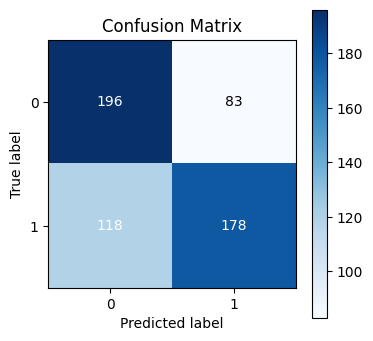

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_dt,figsize=(4,4))

In [ ]:
# Classification report para árbol de decisión
print("Classification report for Decision Tree:\n", classification_report(y_test, y_test_pred_dt))

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66       279
           1       0.68      0.60      0.64       296

    accuracy                           0.65       575
   macro avg       0.65      0.65      0.65       575
weighted avg       0.65      0.65      0.65       575



En la matriz de confusión vemos que de los 575 registros a predecir, 194 fueron predecidos correctamente como verdaderos (True Positive), y 186 correctamente como negativos (True Negative). El resto de los registros fueron mal predichos como Falso positivo (Error tipo 1) o Falso negativo (Error tipo 2).

A partir de los datos que arroja la matriz de confusión se pueden calcular distintas métricas que dan información acerca del desempeño del modelo.

* Accuray (exactitud): indica la proporción de predicciones correctas. Como el resultado es 0.66, significa que el modelo predijo correctamente el 66% de los registros aproximadamente.

* Para la etiqueta Outcome = 0:
  * Precision_0 = 0.64. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 64% de las veces

  * Recall_0 = 0.70. El algoritmo predijo correctamente que Outcome=0 el 70% de las veces.

* Para la etiqueta Outcome = 1:
  * Precision_0 = 0.69. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 69% de las veces

  * Recall_0 = 0.63. El algoritmo predijo correctamente que Outcome=0 el 63% de las veces.

## Modelo: Logistic Regression

In [ ]:
# Creamos el modelo
lr = LogisticRegression(max_iter=1000)

#Entrenamos los datos
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
# Hacemos las predicciones
y_test_pred_lr = lr.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

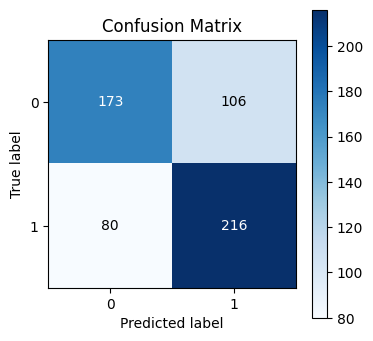

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_lr,figsize=(4,4))

In [ ]:
# Classification report para Regresión Logística
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       279
           1       0.67      0.73      0.70       296

    accuracy                           0.68       575
   macro avg       0.68      0.67      0.67       575
weighted avg       0.68      0.68      0.68       575



En la matriz de confusión vemos que de los 575 registros a predecir, 173 fueron predecidos correctamente como verdaderos (True Positive), y 216 correctamente como negativos (True Negative). El resto de los registros fueron mal predichos como Falso positivo (Error tipo 1) o Falso negativo (Error tipo 2).

A partir de los datos que arroja la matriz de confusión se pueden calcular distintas métricas que dan información acerca del desempeño del modelo.

* Accuray (exactitud): indica la proporción de predicciones correctas. Como el resultado es 0.68, significa que el modelo predijo correctamente el 68% de los registros aproximadamente.

* Para la etiqueta Outcome = 0:
  * Precision_0 = 0.68. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 68% de las veces

  * Recall_0 = 0.62. El algoritmo predijo correctamente que Outcome=0 el 62% de las veces.

* Para la etiqueta Outcome = 1:
  * Precision_0 = 0.67. Esto dice que las veces que el algoritmo predijo que Outcome=0 fue correcto el 67% de las veces

  * Recall_0 = 0.73. El algoritmo predijo correctamente que Outcome=0 el 73% de las veces.

## Conclusiones sobre los modelos aplicados

Como vimos previamente, la variable Outcome que queremos predecir tiene dos categorías: 0 y 1, que resprentan si hay o no cardiopatía.
De los 575 registros que han sido seleccionados de manera aleatoria para la parte de Test de los datos, las categorías 0 y 1 están distribuídas equitativamente. Por lo que la métrica Accuracy (exactitud) puede ser tenida en cuenta.

Los modelos SVM y Logistic Regression tuvieron una exactitud del 68%, mientras que Decision Tree tuvo una exactitud de 66%. Esto parece indicar que los dos primeros modelos fueron más eficientes para predecir correctamente los registros.

De estos dos modelos con mayor exactitud, el SVM tuvo levemente una mayor Precision (proporción de la veces que predijo un cierto resultado, predijo correctamente el valor real) para la etiqueta 0 (68%) que para 1 (67%).
Para el modelo Logistic Regression fue al revés. La Precisión para 0 fue de 67% y para el 1 fue de 68%.

En tanto al Recall (proporción de veces que predijo correctamente un resultado), en el modelo SVM fue 66% para la etiqueta 0 y, fue el 69% de las veces para la etiqueta 1.
En tanto Logistic Regression fue 62% para 0 y del 73% para 1.


Dados estos resultados, personalmente considero que si tuviera que elegir un solo modelo me quedaría con SVM ya que (al igual que Logistic Regression) tuvo la mayor exactitud y un precision prácticamente igual a la del modelo LR, pero tuvo una sensibilidad (recall) más equilibrida entre las etiquetas.
En cambio Logistic Regression, tuvo una sensibilidad mas desproporcionada, acertando menos en las predicciones de 0, pero mucho más en las de 1.
Además, SVM fue el modelo que más Verdaderos Positivos (TP) tuvo entre estos dos modelos.
Si consideramos los tres modelos propuestos, el que arrojó más TP fue Decision Tree.



# Duodécima entrega: reducción de dimensiones y algoritmos de agrupación.

## Reducción de dimensionalidad

El propósito de aplicar algún méotodo de reducción de dimensiones es poder manejar un conjunto de datos con demasiadas variables y poder extraer caracterísitcas o componentes en menor cantidad para poder sintetizar la información del dataset de una manera más compacta y sencilla de manejar.

En este este dataset, que tiene un poco mas de 10 variables no considero que sea totalmente necesario reducir la dimensionalidad, pero luego tendrá algunos beneficios (que veremos más adelente).

En este caso he elegido dos métodos de reducción para aplicar: PCA y t-SNE.

Lo aplicaremos de manera de que el método nos devuelva 2 componentes (c1 y c2). Luego las graficaremos en un scatterplot para ver que cómo representan al dataset original estas nuevas componentes. En este dataset el objetivo será distinguir las dos categorías de la variable target HeartDisease (Outcome).

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.277778,1,1,0.657534,0.617521,0,1,0.777778,0,0.295455,2
1,0.444444,0,2,0.931507,0.384615,0,1,0.659259,0,0.409091,1
2,0.222222,1,1,0.520548,0.604701,0,2,0.229630,0,0.295455,2
3,0.425926,0,0,0.630137,0.457265,0,1,0.303704,1,0.465909,1
4,0.537037,1,2,0.794521,0.416667,0,1,0.407407,0,0.295455,2
...,...,...,...,...,...,...,...,...,...,...,...
2013,0.925926,1,0,0.657534,0.309829,0,1,0.822222,0,0.295455,2
2014,0.425926,1,1,0.383562,0.232906,0,1,0.644444,0,0.295455,2
2015,0.685185,1,0,0.726027,0.463675,1,1,0.511111,0,0.500000,2
2016,0.462963,1,0,0.794521,0.388889,0,2,0.614815,0,0.295455,2


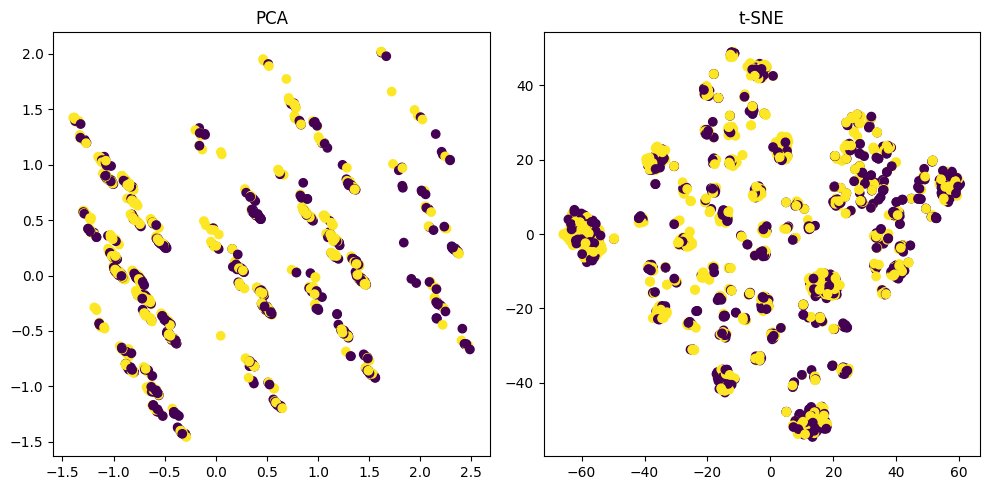

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aplicamos PCA
pca = PCA(n_components=2)   # reduce a 2 componentes el dataset
pca_result = pca.fit_transform(X)   #genera un nuevo dataset

# Aplicamos t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

# Graficamos C1 vs. C2 para PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y)
plt.title('PCA')

# Graficamos C1 vs. C2 para T-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y)
plt.title('t-SNE')

plt.tight_layout()
plt.show()


En las visualizaciones de arriba podemos ver como han quedado las nuevas componentes C1 vs. C2 que se obtuvieron con los algoritmos PCA y t-SNE.
En particular, no debemos prestar tanta atención a comparar como han quedado distribuidos los puntos entre un algoritmo y otro, ya qué como son métodos distintos arrojarán resultados distintos, y fundamentalmente porque no han sido utilizados como algoritmos de agrupación, sino para guardar la mayor parte de la información del dataset original y reducir las dimensiones del dataset.

Lo que si debemos tener en cuenta es que, al haber agregado el parámetro c=y podemos distinguir en el scatterplot a qué categoría de y (Outcome) corresponde cada punto.
Por lo que que se puede apreciar en las dos visualizaciones, la distribución de las categorías en el gráfico de puntos parece ser bastante errática, es decir, vemos que los colores (o sea, las categorías) están muy mezclados entre si.
En otras palabras, agrupar estos puntos en dos categorías parece ser una tarea muy difícil, dada su distribución tan errática.


## Agrupación

Con los métodos de agrupación buscaremos agrupar subconjuntos bajo algún criterio, que pueden ser la similitud entre ellos o su proximidad.

Estos cúmulos que disntiguirá el método no necesariamente serán las categorías de la variable y (Outcome).

Tomemos las componentes C1 y C2 que generó TSNE, y grafiquemos C1 vs C2 sin distinción de colores entre las categorías.

Text(0.5, 1.0, 't-SNE')

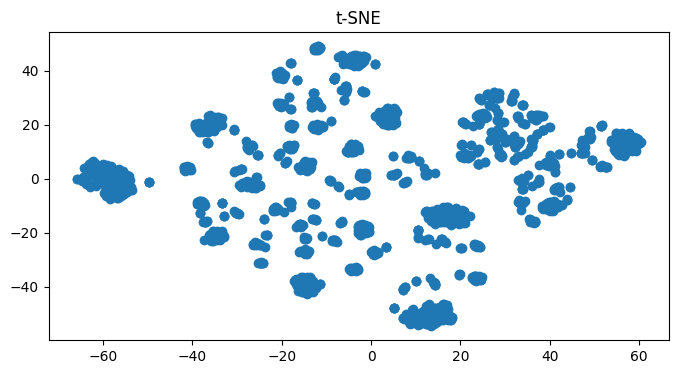

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Agglomerative Clustering')

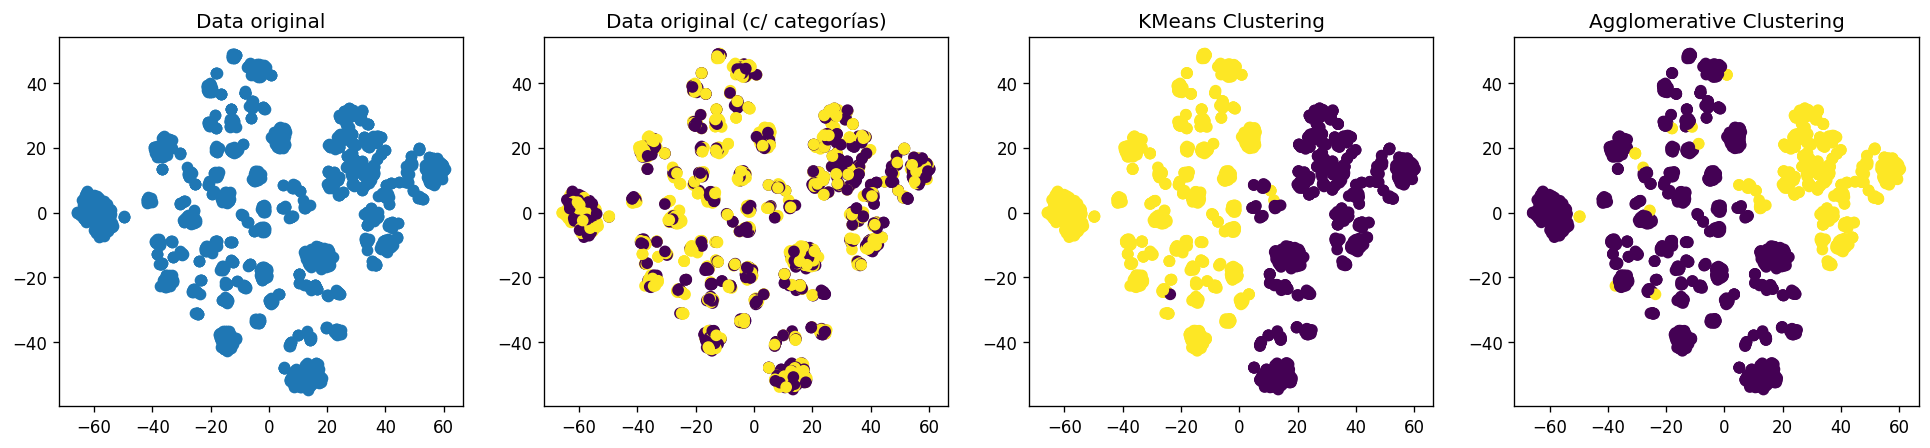

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
# vamos a graficar 4 scatterplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4), dpi=120)

# plot original del dataset
ax[0].scatter(tsne_result[:, 0], tsne_result[:, 1])
ax[0].set_title('Data original')

# plot original del dataset (con categorias)
ax[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y)
ax[1].set_title('Data original (c/ categorías)')

# KMeans clustering
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax[2].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_km)
ax[2].set_title('KMeans Clustering')

# Agglomerative clustering
ac = AgglomerativeClustering(n_clusters=2)
y_ac = ac.fit_predict(X)
ax[3].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_ac)
ax[3].set_title('Agglomerative Clustering')

En la imagen de arriba tenemos 4 scatterplot. El del primero contiene a C1 vs C2 sin distinción de categorías. El segundo con las categorías como realmente son.
Luego en la tercera visualización vemos cómo disntiguió dos grupos distintos el algoritmo KMeans, y en la cuarta según Agglomerative.
Entre estos dos últimos algoritmos los resultados fueron bastante similares, pero más allá de estos resultados, pareciera que (para este dataset) los métodos de clustering no tienen un beneficio evidente. No parecer ser eficientes en tanto a que los clúster que distingue no tienen relación con las categoría a la que corresponde cada punto, ya que ese no es el fin del método.
Pero esto no quita que los clústers que identificó el método sean útiles para otro tipo de análisis, como podría ser la detección de outliers, por mencionar algún ejemplo.

Para el método KMeans podemos hacer uso también del método del codo. El objetivo de este método es encontrar el número óptimo de cúmulos, es decir el valor de k. El número óptimo lo encontraremos en la gráfica que arroja el método, y lo veremos donde se produce una disminución signficativa en la variación al aumentar la cantidad de clusters.

El punto del codo representa un equilibrio entre el ajuste (cuanto menor sea la suma de las distancias al cuadrado, mejor) y evitar un exceso de clusters.

In [ ]:
k_values = range(1, 10)
kmeans_wcss = []  # Within-Cluster-Sum-of-Squares (WCSS)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)

    kmeans_wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

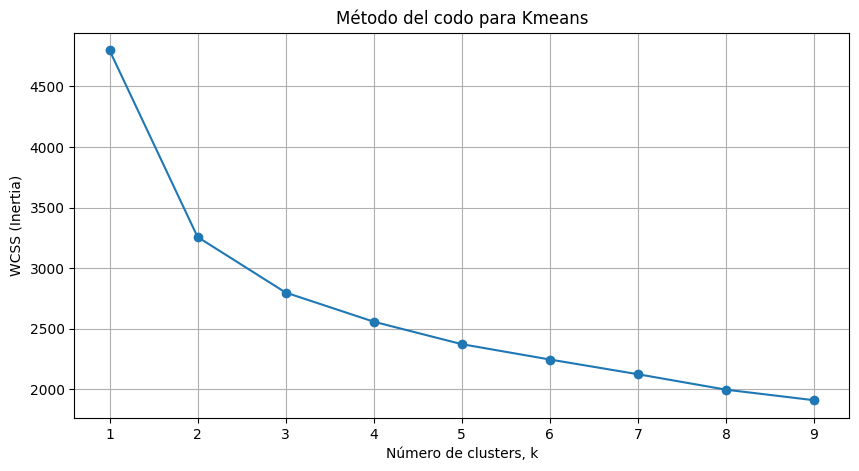

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_wcss, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('WCSS (Inertia)')
plt.title('Método del codo para Kmeans')
plt.grid(True)
plt.show()

Podemos ver que la mayor dismiunción se da entre k=2 y k=3 pero sobre todo 2, por lo que podemos asumir que el número ótimo de clusters es 3, y no 2 como aplicamos en el algoritmo.

Ahora, usamos el método Silhouette Score para evaluar la calidad del clustering.

In [ ]:
from sklearn.metrics import silhouette_score

k_values = range(2, 10)
kmeans_scores = []
agg_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    agg = AgglomerativeClustering(n_clusters=k).fit(X)

    kmeans_score = silhouette_score(X, kmeans.labels_)
    agg_score = silhouette_score(X, agg.labels_)

    kmeans_scores.append(kmeans_score)
    agg_scores.append(agg_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

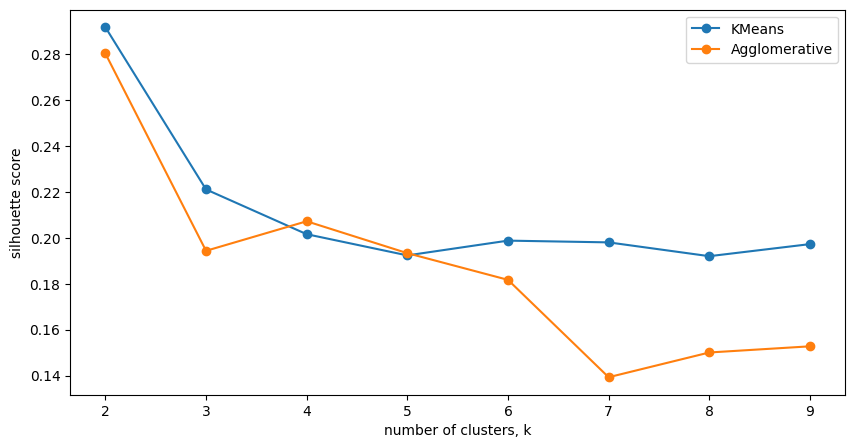

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_scores, '-o', label='KMeans')
plt.plot(k_values, agg_scores, '-o', label='Agglomerative')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.legend()
plt.show()

Teniendo en cuenta que el mejor valor es 1 y el peor -1, tanto para KMeans como Agglomerative el mejor resultado fue k=2, pero con valores cercanos a 0.3, lo cual indíca que efectivamente 2 fue el mejor número de cúmulos pero aun así no ha sido muy efectivo al momento de agrupar.
Es decir, cómo los valores estan mas cercanos a 0 que a 1, indica que los cúmulos están superpuestos, que es lo que vimos en las visualizaciones anteriores.

# Decimotercera entrega:Cross Validation

Previamente habíamos aplicado métodos de clasificación al dataset, en particular Logistic Regression.
De manera aleatoria tomamos el 70% de los registros para entrenar los modelos  y el 30% para test.

Retomemos lo hecho previamente con el objetivo de validar la eficiencia del modelo aplicado. Para lo que haremos será usar el modelo regresión logísitica y hacer las predicciones sobre el conjunto X_test (como habíamos hecho previamente), y tambien haremos predicciones sobre el mismo X_train, de modo de comparar las métricas (usaremos accuracy) en cada uno de los casos, para ver si el modelo es bueno, o si se ajusta muy poco o se sobreajusta a los datos.

Una vez realizado esto, usaremos un método de Cross Validation para confirmar que lo visto con las predicciones anteriores es correcto. Dependiendo del resultado, que puede ser un buen modelo, underfitting u overfitting tomaremos distintas medidas.
Principalmente si es over o underfitting, seguramente tendremos que modificar los hiperparámetros del modelo para obtener resultados más eficientes.

Comenzamos, entrenando el modelo con el conjunto de entrenamiento (X_train, y_train)

In [ ]:
# Creamos el modelo
lr = LogisticRegression()

#Entrenamos los datos
lr.fit(X_train, y_train)

# Hacemos las predicciones
y_test_pred_lr = lr.predict(X_test)

# Classification report para Regresión Logística, comparando el conjunto y_test con y_test_pred_lr
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_test_pred_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       279
           1       0.67      0.73      0.70       296

    accuracy                           0.68       575
   macro avg       0.68      0.67      0.67       575
weighted avg       0.68      0.68      0.68       575



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ahora hacemos el mismo procedimiento, pero haciendo las predicciones sobre el mismo conjunto donde se entrenó (X_train)

In [ ]:
y_pred_train_lr = lr.predict(X_train)

print("Classification report for Logistic Regression:\n", classification_report(y_train, y_pred_train_lr))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.59      0.60       622
           1       0.66      0.69      0.67       719

    accuracy                           0.64      1341
   macro avg       0.64      0.64      0.64      1341
weighted avg       0.64      0.64      0.64      1341



Comparamos los resultados de accuracy para los dos conjuntos.

In [ ]:
print("Accuracy para conjunto de entrenamiento", accuracy_score(y_train, y_pred_train_lr))
print("Accuracy para el conjunto de test", accuracy_score(y_test, y_test_pred_lr))

Accuracy para conjunto de entrenamiento 0.6420581655480985
Accuracy para el conjunto de test 0.6765217391304348


Si bien, el resultado para el conjunto de test se ajustó mejor que el de entrenamiento, ninguno de las dos métricas es lo suficientemente buena como para afirmar que se ajusta bien al modelo.
Por el contrario, el hecho de que para el conjunto de test el accuracy sea mayor que el de entrenamiento indica que el modelo no se está ajustando correctamente a los datos en el entrenamiento. Por lo que podríamos inferir que nos encontramos en un caso de undefitting.

Más allá de estos resultados, tenemos que validarlos. Es decir, verificar que realmente estamos en presencia de underfitting. Para eso aplicaremos el método Stratified K-Folds, ya que divide los registros en K folds pero con la particularidad que intenta que la proporción de las categorías dentro de cada fold sea la mimsa que en el total del dataset para evitar sesgos.

In [ ]:
y_train = y_train.ravel() # para poder pasarlo como argumento a cross_validate

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# definimos el metodo de stratified k fold, para 5 folds
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True, random_state=42)

# aplicamos cross validation y ponemos True en train score para obtener las métricas (accuracy) para ambos conjuntos
cv_results = cross_validate(lr, X_train, y_train, cv=stratified_kfold, scoring='accuracy', return_train_score=True)

# calculamos el promedio del accuray para los 5 folds
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])

print(f"Mean Train Score: {mean_train_score}")
print(f"Mean Test Score: {mean_test_score}")

Mean Train Score: 0.6441086158211736
Mean Test Score: 0.635360372856905


Ahora podemos ver que hay una leve mejora en el modelo, ya que ambas métricas ahora son semejantes, y sobre todo el accuracy de entrenamiento es mayor al de testeo. No podemos afirmar que sea un caso de overfitting (pues no son valores muy altos), y si bien los valores podrían ser mejores, podemos confirmar con los resultados del Stratified K-Folds que es un caso de underfitting.

Luego, podemos mejorar el modelo modificando los hiperparámetros.